**引入模块**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from IPython.display import HTML
import numpy as np
import re
import random

**读取数据**

In [2]:
df = pd.read_excel('D:\\项目\\数据分析项目\\南宁二手房.xlsx', sheet_name='Sheet2')
df.head(10)

,Source.Name,标题,户型,面积,朝向,楼层,建造年份,小区,区,总价,均价
0,兴宁.xlsx,那考河湿地公园旁精装4房,4室2厅2卫,112㎡,北,中层(共27层),2020年建造,中海九玺,兴宁,118.0,10536元/㎡
1,兴宁.xlsx,户型大气 交通便利 配套齐全,4室2厅2卫,89㎡,南,低层(共33层),2015年建造,中海国际社区,兴宁,82.0,9214元/㎡
2,兴宁.xlsx,精装 电梯房 满两年 113平 朝向北 诚心出售 价格可议,4室2厅2卫,113㎡,北,高层(共29层),2020年建造,中海九玺,兴宁,115.0,10177元/㎡
3,兴宁.xlsx,狮山公园地铁口员工房7999起，送物业费！,3室2厅2卫,111㎡,南,NaN,2024年建造,盛邦香颂品园,兴宁,105.0,9460元/㎡
4,兴宁.xlsx,狮山公园旁瀚林山水源 精装大三房 送全新装修 未住过随时看房,3室2厅2卫,87.1㎡,南北,高层(共33层),2014年建造,瀚林山水源,兴宁,80.0,9185元/㎡
5,兴宁.xlsx,荣和山水绿城2期，厅出阳台3房2卫业主急售，价格可,3室2厅2卫,89㎡,南,低层(共34层),2012年建造,荣和山水绿城(二期),兴宁,73.0,8203元/㎡
6,兴宁.xlsx,113平 精装 满两年 南北通透 4室 房东急置换 诚心出售,4室2厅2卫,113.83㎡,南北,高层(共20层),2020年建造,中海九玺,兴宁,115.0,10103元/㎡
7,兴宁.xlsx,东葛路旁，7999任选现房，3号线地铁口，送家装,3室2厅2卫,104㎡,北,NaN,2024年建造,华宏云樾观棠,兴宁,104.0,10000元/㎡
8,兴宁.xlsx,瀚林山水源 5房2厅110万,5室2厅2卫,120.43㎡,东,高层(共34层),2014年建造,瀚林山水源,兴宁,110.0,9134元/㎡
9,兴宁.xlsx,阳台朝南通风好 电梯金源橘子郡105平 满五年 实拍房源,3室2厅2卫,105㎡,南北,低层(共32层),2012年建造,金源橘子郡,兴宁,74.0,7048元/㎡


**查看表格描述**

In [3]:
df.describe()

,总价
count,2999.000000
mean,98.754118
std,63.315629
min,13.000000
25%,76.450000
50%,94.000000
75%,115.000000
max,3000.000000


**查看是否有缺失值**

In [4]:
df.isnull().sum()

Source.Name       0
标题                0
户型              505
面积                0
朝向                0
楼层              550
建造年份           1968
小区                0
区                 0
总价              519
均价             1410
dtype: int64

**查看户型有几种值（其他的值比较多无需看几种值）**

In [5]:
df['户型'].unique()

array(['4室2厅2卫', '3室2厅2卫', '5室2厅2卫', '3室2厅1卫', '5室2厅3卫', '2室2厅2卫',
       '1室1厅1卫', '2室2厅1卫', '4室1厅1卫', '6室2厅2卫', '4室2厅1卫', '2室1厅1卫',
       '4室2厅3卫', '1室0厅1卫', '7室3厅2卫', '6室2厅3卫', '5室3厅4卫', '3室3厅3卫',
       '3室1厅1卫', '3室2厅0卫', '3室1厅2卫', '3室0厅0卫', '4室2厅0卫', '3室3厅2卫',
       '7室3厅7卫', '6室3厅4卫', '3室2厅3卫', '5室3厅3卫', '6室2厅4卫', '6室3厅9卫',
       '4室0厅0卫', '4室1厅2卫', nan], dtype=object)

**用“暂不清楚”填充缺失值,其中总价的用之前的mean算出的均价填充**

In [6]:
df['户型'].fillna('暂不清楚', inplace=True)
df.isnull().sum()
df['楼层'].fillna('暂不清楚', inplace=True)
df.isnull().sum()
df['建造年份'].fillna('暂不清楚', inplace=True)
df.isnull().sum()
df['总价'].fillna('98', inplace=True)
df.isnull().sum()
df['均价'].fillna('暂不清楚', inplace=True)
df.isnull().sum()

Source.Name    0
标题             0
户型             0
面积             0
朝向             0
楼层             0
建造年份           0
小区             0
区              0
总价             0
均价             0
dtype: int64

In [7]:
df['户型'].unique()

array(['4室2厅2卫', '3室2厅2卫', '5室2厅2卫', '3室2厅1卫', '5室2厅3卫', '2室2厅2卫',
       '1室1厅1卫', '2室2厅1卫', '4室1厅1卫', '6室2厅2卫', '4室2厅1卫', '2室1厅1卫',
       '4室2厅3卫', '1室0厅1卫', '7室3厅2卫', '6室2厅3卫', '5室3厅4卫', '3室3厅3卫',
       '3室1厅1卫', '3室2厅0卫', '3室1厅2卫', '3室0厅0卫', '4室2厅0卫', '3室3厅2卫',
       '7室3厅7卫', '6室3厅4卫', '3室2厅3卫', '5室3厅3卫', '6室2厅4卫', '6室3厅9卫',
       '4室0厅0卫', '4室1厅2卫', '暂不清楚'], dtype=object)

**统计各城区二手房数量**

In [8]:
g = df.groupby('Source.Name')
df_region = g.count()['小区']
region = df_region.index.tolist()
count = df_region.values.tolist()
df_region

Source.Name
兴宁.xlsx      560
江南.xlsx      517
良庆qu.xlsx    519
西乡塘.xlsx     526
邕宁区.xlsx     891
青秀qu.xlsx    505
Name: 小区, dtype: int64

**邕宁区房源多最多，剩下的区房源较为均衡**

**发现区名有问题，修改一下**

In [9]:
df_region = df.replace({'兴宁.xlsx':'兴宁区','江南.xlsx':'江南区','良庆qu.xlsx':'良庆区','西乡塘.xlsx ':'西乡塘','邕宁区.xlsx':'邕宁区','青秀qu.xlsx':'青秀区'})
g = df.groupby('Source.Name')
df_region


,Source.Name,标题,户型,面积,朝向,楼层,建造年份,小区,区,总价,均价
0,兴宁区,那考河湿地公园旁精装4房,4室2厅2卫,112㎡,北,中层(共27层),2020年建造,中海九玺,兴宁,118.0,10536元/㎡
1,兴宁区,户型大气 交通便利 配套齐全,4室2厅2卫,89㎡,南,低层(共33层),2015年建造,中海国际社区,兴宁,82.0,9214元/㎡
2,兴宁区,精装 电梯房 满两年 113平 朝向北 诚心出售 价格可议,4室2厅2卫,113㎡,北,高层(共29层),2020年建造,中海九玺,兴宁,115.0,10177元/㎡
3,兴宁区,狮山公园地铁口员工房7999起，送物业费！,3室2厅2卫,111㎡,南,暂不清楚,2024年建造,盛邦香颂品园,兴宁,105.0,9460元/㎡
4,兴宁区,狮山公园旁瀚林山水源 精装大三房 送全新装修 未住过随时看房,3室2厅2卫,87.1㎡,南北,高层(共33层),2014年建造,瀚林山水源,兴宁,80.0,9185元/㎡
...,...,...,...,...,...,...,...,...,...,...,...
3513,青秀区,十四中建政＋逸夫 南宁市手表厂生活区,暂不清楚,66.25㎡,南,高层(共7层),暂不清楚,南宁市手表厂生活区,青秀,89.5,13510元/㎡
3514,青秀区,南宁市人民检察院宿舍4室2厅2卫近地铁,暂不清楚,154.45㎡,南,中层(共26层),暂不清楚,南宁市人民检察院宿舍,青秀,240.0,15540元/㎡
3515,青秀区,三美 对面市环保局宿舍，门口即地铁站,暂不清楚,80.39㎡,南,高层(共8层),暂不清楚,南宁市环境保护局宿舍,青秀,80.0,9952元/㎡
3516,青秀区,民乐路 和南宁市二中的好房，房东直卖了。,暂不清楚,300㎡,南北,共2层,暂不清楚,公安厅大院,青秀,360.0,12000元/㎡


**看房价top前十**

In [10]:
df_region['总价'] = df_region['总价'].astype(float)
top_price = df_region.sort_values(by="总价",ascending=False)[:10]
top_price

,Source.Name,标题,户型,面积,朝向,楼层,建造年份,小区,区,总价,均价
3442,青秀区,南宁市青秀区中心位置大马路边上占地13亩土地 两百个一亩而已,暂不清楚,1200㎡,南北,共3层,暂不清楚,托斯卡那,青秀,3000.0,25000元/㎡
3385,青秀区,南宁市中心单位双拼边套别墅出行方便，业主回老家发展忍痛割爱,暂不清楚,380㎡,南北,共4层,暂不清楚,电信生活小区(别墅),青秀,390.0,10264元/㎡
3516,青秀区,民乐路 和南宁市二中的好房，房东直卖了。,暂不清楚,300㎡,南北,共2层,暂不清楚,公安厅大院,青秀,360.0,12000元/㎡
3243,青秀区,烟草琅东生活区 14中 送车位 业主急卖,暂不清楚,146㎡,南,高层(共8层),暂不清楚,南宁市烟草专卖局公司琅东宿舍区,青秀,350.0,23973元/㎡
291,兴宁区,富豪要回去了，清理南宁的房产， 委托，只能 人带看,5室3厅4卫,205㎡,南北,共5层,2021年建造,北投荷院(别墅),兴宁,326.0,15903元/㎡
96,兴宁区,盛天东郡 大户型 精装 带三个车位,5室2厅3卫,301㎡,南,高层(共32层),2015年建造,盛天东郡,兴宁,320.0,10632元/㎡
3053,青秀区,滨湖路 和14中 琅东烟草局宿舍精装3房出售 已装好电梯,暂不清楚,108㎡,南北,高层(共7层),暂不清楚,南宁市烟草专卖局公司琅东宿舍区,青秀,275.0,25463元/㎡
180,兴宁区,盛天东郡 满二 得房率高 有电梯 商品住宅 房龄新,4室2厅3卫,215.51㎡,南,低层(共32层),2015年建造,盛天东郡,兴宁,260.0,12065元/㎡
784,江南区,带两个车位 166平5房 交通便利,5室2厅2卫,166㎡,东南,低层(共30层),2022年建造,华润置地西园悦府,江南,258.0,15543元/㎡
1010,江南区,头牌一线江景房 送两个车位 华润西园大平层毛坯5房166平,5室2厅2卫,165.42㎡,南北,低层(共30层),2022年建造,华润置地西园润府,江南,250.0,15114元/㎡


**可视化**

In [11]:
#调整字体，使图像中可展示中文
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False

**房屋朝向**

In [12]:
#查看目前表格内楼房朝向情况
g_toward = df.groupby('朝向')
g_toward.count()['小区']

朝向
东      121
东北      40
东南     142
东西       2
北      250
南     1414
南北    1441
西       23
西北      19
西南      66
Name: 小区, dtype: int64

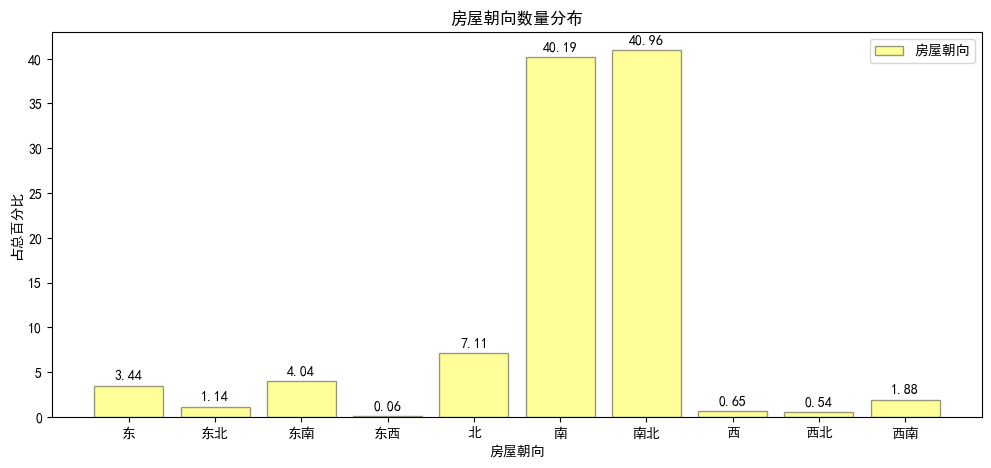

In [13]:
#将以上信息制作成字典(其他存储形式也可)
data_dict = {'东': 121, '东北': 40, '东南': 142, '东西': 2, '北': 250, '南': 1414, '南北': 1441, '西': 23, '西北': 19, '西南': 66}

#加和计算各个朝向所占据的百分比
sum_Towards = sum(data_dict[year_key] for year_key in data_dict)
east = round((121/sum_Towards)*100,2)
northeast = round((40/sum_Towards)*100,2)
southeast = round((142/sum_Towards)*100,2)
east_and_west = round((2/sum_Towards)*100,2)
north = round((250/sum_Towards)*100,2)
south = round((1414/sum_Towards)*100,2)
north_and_south = round((1441/sum_Towards)*100,2)
west = round((23/sum_Towards)*100,2)
northwest = round((19/sum_Towards)*100,2)
southwest = round((66/sum_Towards)*100,2)


#开始绘制
plt.figure(figsize=(12, 5))

x_Towards = ['东', '东北', '东南', '东西', '北','南','南北','西','西北','西南']
y_Percentage = [east,northeast,southeast,east_and_west,north,south,north_and_south,west,northwest,southwest]

plt.bar(
    x_Towards
    ,y_Percentage
    ,color = 'yellow'
    ,alpha = 0.4
    ,label = '房屋朝向'
    ,edgecolor = 'black')

#图像中显示数据
for i in range(len(x_Towards)):
    plt.annotate(str(y_Percentage[i]), xy=(x_Towards[i], y_Percentage[i]), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom')
    
#图像中的标签
plt.title('房屋朝向数量分布')
plt.xlabel('房屋朝向')
plt.ylabel('占总百分比')

plt.legend()

#展示
plt.show()

**二手房建造年份**

In [14]:
#查看目前表格内楼建造年份情况
s_year = df['建造年份']
s_year = s_year.value_counts()
s_year

暂不清楚       1968
2020年建造     211
2015年建造     155
2021年建造     140
2018年建造     123
2016年建造     121
2022年建造     114
2019年建造      98
2024年建造      66
2017年建造      65
2023年建造      60
2010年建造      56
2013年建造      50
2012年建造      48
2014年建造      46
2000年建造      31
2025年建造      23
2005年建造      23
2008年建造      18
2009年建造      18
2006年建造      15
2011年建造      13
2003年建造      11
2007年建造       8
1998年建造       8
2004年建造       6
2002年建造       5
1999年建造       5
2026年建造       2
1996年建造       2
1995年建造       2
1993年建造       2
1990年建造       2
2001年建造       2
1997年建造       1
Name: 建造年份, dtype: int64

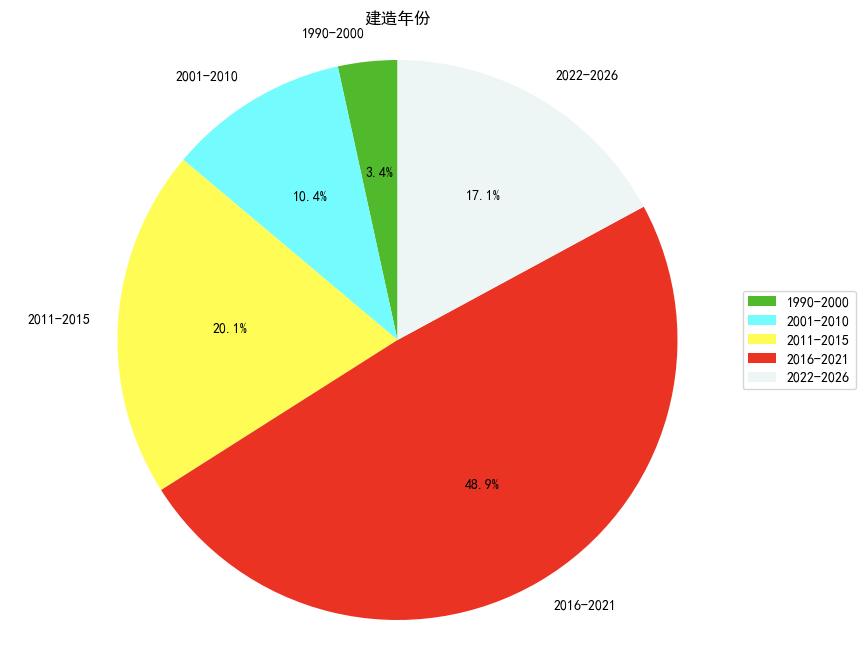

In [15]:
#将以上信息制作成字典(其他存储形式也可)
data = {
    '1990': 2, '1993': 2, '1995': 2, '1996': 2, '1997': 1, '1998': 8, '1999': 5, '2000': 31,
    '2001': 2, '2002': 5, '2003': 11, '2004': 6, '2005': 23, '2006': 15, '2007': 8, '2008': 18, '2009': 18, '2010': 56,
    '2011': 13, '2012': 48, '2013': 50, '2014': 46, '2015': 155,
    '2016': 121, '2017': 65, '2018': 123, '2019': 98, '2020': 211, '2021': 140,
    '2022': 114, '2023': 60, '2024': 66, '2025': 23, '2026': 2
}

#加和计算各个朝向所占据的百分比
sum_year = sum(data[year_key] for year_key in data)
Early2000s_sum = sum(value for year, value in data.items() if 1990 <= int(year) <= 2000)
Mid2000s_sum = sum(value for year, value in data.items() if 2001 <= int(year) <= 2010)
Early2010s_sum = sum(value for year, value in data.items() if 2011 <= int(year) <= 2015)
Mid2010s_sum = sum(value for year, value in data.items() if 2016 <= int(year) <= 2021)
Late2020s_sum = sum(value for year, value in data.items() if 2022 <= int(year) <= 2026)

Early2000s = round((Early2000s_sum/sum_year)*100,2)
Mid2000s = round((Mid2000s_sum/sum_year)*100,2)
Early2010s = round((Early2010s_sum/sum_year)*100,2)
Mid2010s = round((Mid2010s_sum/sum_year)*100,2)
Late2020s = round((Late2020s_sum/sum_year)*100,2)


#开始绘制
sizes = [Early2000s,Mid2000s,Early2010s,Mid2010s,Late2020s]
toward_labels = ['1990-2000', '2001-2010', '2011-2015', '2016-2021', '2022-2026']
toward_colors = ['#51BA2C','#73FBFD','#FFFD55','#EB3324','#EEF5F5']

plt.figure(figsize=(10, 8))

plt.pie(
    sizes
    ,labels = toward_labels
    ,colors = toward_colors
    ,autopct = '%1.1f%%'
    ,startangle = 90)

#图像中的标签
plt.title('建造年份')
plt.axis('equal')

plt.legend(loc='right',bbox_to_anchor=(1.1, 0.5))

#展示
plt.show()

**二手房楼层分布**

In [16]:
#查看当前表格中楼层的唯一值，为接下来的映射做准备
df['楼层'].unique()

array(['中层(共27层)', '低层(共33层)', '高层(共29层)', '暂不清楚', '高层(共33层)', '低层(共34层)',
       '高层(共20层)', '高层(共34层)', '低层(共32层)', '中层(共32层)', '高层(共30层)',
       '低层(共18层)', '中层(共33层)', '中层(共7层)', '高层(共16层)', '高层(共32层)',
       '高层(共18层)', '高层(共46层)', '高层(共21层)', '中层(共36层)', '高层(共17层)',
       '高层(共23层)', '中层(共34层)', '中层(共30层)', '低层(共46层)', '高层(共31层)',
       '中层(共49层)', '低层(共23层)', '低层(共31层)', '高层(共11层)', '低层(共37层)',
       '高层(共26层)', '高层(共6层)', '低层(共25层)', '中层(共46层)', '中层(共11层)',
       '中层(共31层)', '低层(共49层)', '高层(共49层)', '低层(共30层)', '中层(共9层)',
       '高层(共12层)', '中层(共38层)', '低层(共22层)', '高层(共36层)', '中层(共6层)',
       '低层(共24层)', '高层(共28层)', '低层(共7层)', '低层(共12层)', '低层(共11层)',
       '低层(共8层)', '高层(共8层)', '高层(共7层)', '中层(共19层)', '中层(共18层)',
       '中层(共23层)', '高层(共22层)', '中层(共29层)', '高层(共24层)', '中层(共26层)',
       '中层(共28层)', '共5层', '低层(共20层)', '高层(共45层)', '低层(共27层)', '低层(共36层)',
       '高层(共39层)', '低层(共39层)', '中层(共17层)', '中层(共35层)', '中层(共45层)',
       '高层(共25层)', '低层(共45层)', '中层(共42层)', '中层(共44层)', 

In [17]:
#映射
df['楼层'] = df['楼层'].map({
    '中层(共27层)': 27
 ,'低层(共33层)': 33
 ,'高层(共29层)': 29
 ,'暂不清楚': 0
 ,'高层(共33层)': 33
 ,'低层(共34层)': 34
 ,'高层(共20层)': 20
 ,'高层(共34层)': 34
 ,'低层(共32层)': 32
 ,'中层(共32层)': 32
 ,'高层(共30层)': 30
 ,'低层(共18层)': 18
 ,'中层(共33层)': 33
 ,'中层(共7层)': 7
,'高层(共16层)': 16
,'高层(共32层)': 32
,'高层(共18层)': 18
,'高层(共46层)': 46
,'高层(共21层)': 21
,'中层(共36层)': 36
,'高层(共17层)': 17
,'高层(共23层)': 23
,'中层(共34层)': 34
,'中层(共30层)': 30
,'低层(共46层)': 46
,'高层(共31层)': 31
,'中层(共49层)': 49
,'低层(共23层)': 23
,'低层(共31层)': 31
,'高层(共11层)': 11
,'低层(共37层)': 37
,'高层(共26层)': 26
,'高层(共6层)': 6
,'低层(共25层)': 25
,'中层(共46层)': 46
,'中层(共11层)': 11
,'中层(共31层)': 31
,'低层(共49层)': 49
,'高层(共49层)': 49
,'低层(共30层)': 30
,'中层(共9层)': 9
,'高层(共12层)': 12
,'中层(共38层)': 38
,'低层(共22层)': 22
,'高层(共36层)': 36
,'中层(共6层)': 6
,'低层(共24层)': 24
,'高层(共28层)': 28
,'低层(共7层)': 7
,'低层(共12层)': 12
,'低层(共11层)': 11
,'低层(共8层)': 8
,'高层(共8层)': 8
,'高层(共7层)': 7
,'中层(共19层)': 19
,'中层(共18层)': 18
,'中层(共23层)': 23
,'高层(共22层)': 22
,'中层(共29层)': 29
,'高层(共24层)': 24
,'中层(共26层)': 26
,'中层(共28层)': 28
,'共5层': 5
,'低层(共20层)': 20
,'高层(共45层)': 45
,'低层(共27层)': 27
,'低层(共36层)': 36
,'高层(共39层)': 39
,'低层(共39层)': 39
,'中层(共17层)': 17
,'中层(共35层)': 35
,'中层(共45层)': 45
,'高层(共25层)': 25
,'低层(共45层)': 45
,'中层(共42层)': 42
,'中层(共44层)': 44
,'中层(共20层)': 20
,'中层(共43层)': 43
,'中层(共21层)': 21
,'低层(共42层)': 42
,'低层(共21层)': 21
,'中层(共12层)': 12
,'低层(共6层)': 6
,'中层(共24层)': 24
,'高层(共44层)': 44
,'高层(共35层)': 35
,'高层(共38层)': 38
,'低层(共26层)': 26
,'中层(共25层)': 25
,'高层(共58层)': 58
,'高层(共41层)': 41
,'低层(共40层)': 40
,'低层(共29层)': 29
,'低层(共58层)': 58
,'高层(共51层)': 51
,'低层(共28层)': 28
,'高层(共42层)': 42
,'高层(共40层)': 40
,'中层(共41层)': 41
,'高层(共43层)': 43
,'低层(共41层)': 41
,'中层(共54层)': 54
,'低层(共35层)': 35
,'高层(共14层)': 14
,'高层(共52层)': 52
,'中层(共58层)': 58
,'高层(共27层)': 27
,'低层(共9层)': 9
,'高层(共15层)': 15
,'低层(共14层)': 14
,'中层(共8层)': 8
,'高层(共19层)': 19
,'中层(共15层)': 15
,'低层(共17层)': 17
,'低层(共16层)': 16
,'中层(共47层)': 47
,'低层(共50层)': 50
,'低层(共53层)': 53
,'中层(共55层)': 55
,'中层(共22层)': 22
,'低层(共55层)': 55
,'高层(共53层)': 53
,'高层(共50层)': 50
,'低层(共47层)': 47
,'中层(共53层)': 53
,'中层(共50层)': 50
,'中层(共16层)': 16
,'中层(共61层)': 61
,'高层(共47层)': 47
,'低层(共15层)': 15
,'中层(共13层)': 13
,'低层(共13层)': 13
,'中层(共39层)': 39
,'低层(共19层)': 19
,'中层(共62层)': 62
,'高层(共61层)': 61
,'低层(共38层)': 38
,'低层(共65层)': 65
,'低层(共56层)': 56
,'低层(共61层)': 61
,'中层(共40层)': 40
,'低层(共44层)': 44
,'低层(共43层)': 43
,'低层(共10层)': 10
,'共4层': 4
,'高层(共9层)': 9
,'中层(共10层)': 10
,'中层(共51层)': 51
,'中层(共37层)': 37
,'中层(共48层)': 48
,'高层(共48层)': 48
,'高层(共10层)': 10
,'高层(共13层)': 13
,'低层(共51层)': 51
,'低层(共48层)': 48
,'低层(共54层)': 54
,'共3层': 3
,'共2层': 2
})

区间1的总和: 554
区间2的总和: 440
区间3的总和: 1637
区间4的总和: 274
区间5的总和: 63


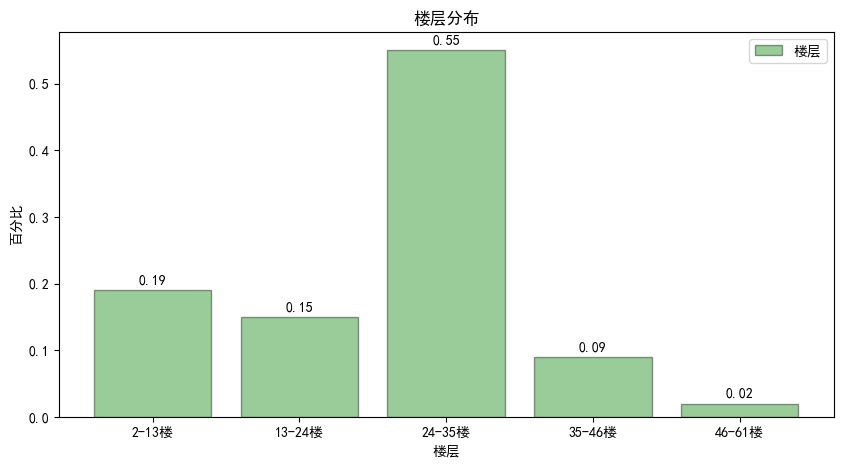

In [18]:
##将以上信息制作成列表(其他存储形式也可)
data = """32    414
33    413
7     243
34    204
30    184
6     115
18    105
31     87
26     84
28     83
27     77
11     67
25     61
8      50
20     50
24     49
46     48
23     46
38     45
29     38
17     32
43     29
49     26
35     25
5      25
45     24
36     23
22     23
16     21
19     20
42     19
50     18
40     18
15     17
51     16
48     15
47     15
9      15
39     14
13     12
12     12
10     11
41     11
21     11
44     10
58     10
53      6
37      5
14      5
61      4
4       2
54      2
62      2
55      2
65      1
56      1
52      1
3       1
2       1"""

# 将数据按行分割并转换为字典，键为楼层，值为数量
data_dict = {}
for line in data.splitlines():
    floor, quantity = line.split()
    data_dict[int(floor)] = int(quantity)

# 找到楼层的最小值和最大值
min_floor = min(data_dict.keys())
max_floor = max(data_dict.keys())

# 计算每个区间的跨度
interval_size = (max_floor - min_floor) // 5

# 初始化区间总和的列表
interval_sums = [0] * 5

# 遍历数据字典，将每个楼层的数量累加到对应的区间总和中
for floor, quantity in data_dict.items():
    interval_index = (floor - min_floor) // interval_size
    if interval_index == 5:
        interval_index = 4
    interval_sums[interval_index] += quantity

# 输出每个区间的总和
for i, sum_value in enumerate(interval_sums):
    print(f"区间{i + 1}的总和: {sum_value}")
    
sum_floor = 554+440+1637+274+63
sum_floor

floor_2_13 = round((554/sum_floor),2)
floor_13_24 = round((440/sum_floor),2)
floor_24_35 = round((1637/sum_floor),2)
floor_35_46 = round((274/sum_floor),2)
floor_46_61 = round((63/sum_floor),2)


#开始绘制
plt.figure(figsize = (10,5))

x_floor = ['2-13楼', '13-24楼', '24-35楼','35-46楼','46-61楼']
y_floor = [floor_2_13
     ,floor_13_24
     ,floor_24_35
     ,floor_35_46
     ,floor_46_61]

plt.bar(
    x_floor
    ,y_floor
    ,color = 'green'
    ,label = '楼层'
    ,alpha = 0.4
    ,edgecolor = 'black')

for i in range(len(x_floor)):
    plt.annotate(str(y_floor[i]), xy=(x_floor[i], y_floor[i]), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom')

#图像的标签
plt.title('楼层分布')
plt.xlabel('楼层')
plt.ylabel('百分比')    

plt.legend()

#展示
plt.show()

**房屋面积分布**

In [19]:
s_area = df['面积']
s_area = s_area.value_counts()
s_area

89㎡        140
143㎡        85
98㎡         72
88㎡         70
118㎡        56
          ... 
168.8㎡       1
98.56㎡       1
89.49㎡       1
140.27㎡      1
300㎡         1
Name: 面积, Length: 1222, dtype: int64

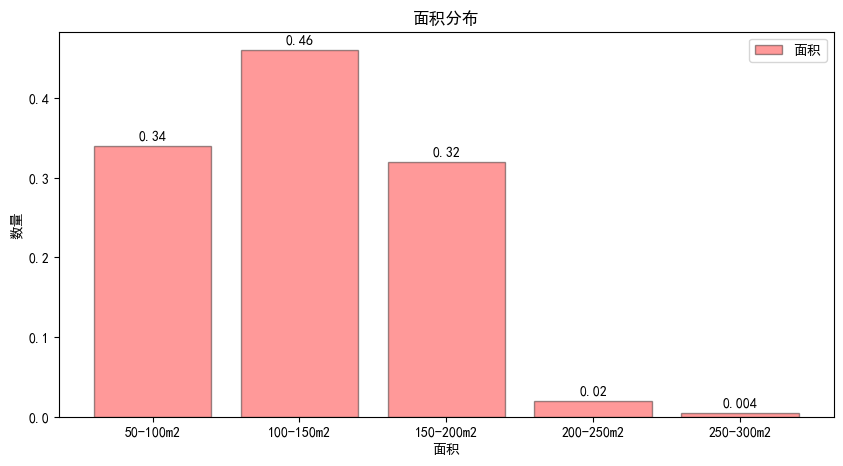

In [20]:
def extract_numbers(input_string):
    # 使用正则表达式查找所有数字
    numbers = re.findall(r'\d+', input_string)
    # 将提取到的字符串数字转换为整数
    return [int(num) for num in numbers]

new_house_area_list = []

house_area = df['面积']
for i in range(0,3518):
    
    input_string = house_area[i]
    numbers = extract_numbers(input_string)
    new_house_area_list.append(numbers)

flattened = [item for sublist in new_house_area_list for item in sublist]

sorted_data = sorted(flattened)
counts_total_area = len(sorted_data)

#求百分比
data_1_50 = [x for x in flattened  if 1 <= x <= 80]
counts_data_1_50 = round((len(data_1_50)/counts_total_area),2)
data_51_100 =[x for x in flattened  if 51 <= x <= 100]
counts_data_51_100 = round((len(data_51_100)/counts_total_area),2)
data_101_150 = [x for x in flattened  if 101 <= x <= 150]
counts_data_101_150 = round((len(data_101_150)/counts_total_area),2)
data_151_200 = [x for x in flattened  if 151 <= x <= 200]
counts_data_151_200 = round((len(data_151_200)/counts_total_area),2)
data_201_300 = [x for x in flattened  if 201 <= x <= 300]
counts_data_201_300 = round((len(data_201_300)/counts_total_area),3)


#开始绘制
plt.figure(figsize = (10,5))

x_area = ['50-100m2', '100-150m2', '150-200m2','200-250m2','250-300m2']
y_area = [counts_data_1_50
     ,counts_data_51_100
     ,counts_data_101_150
     ,counts_data_151_200
     ,counts_data_201_300]

plt.bar(
    x_area
    ,y_area
    ,color = 'red'
    ,label = '面积'
    ,alpha = 0.4
    ,edgecolor = 'black')

for i in range(len(x_area)):
    plt.annotate(str(y_area[i]), xy=(x_area[i], y_area[i]), xytext=(0, 3),
                textcoords='offset points', ha='center', va='bottom')

#图像的标签
plt.title('面积分布')
plt.xlabel('面积')
plt.ylabel('数量')
    
plt.legend()

#展示
plt.show()